In [1]:
import copy
import glob
# import json
import os
import pickle
import time
import random

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import rasterio
# import pandas as pd
# import pickle
# import statistics
# import utm

from koger_detection.georef.drone_movement import get_warps

import orthocount.mapping_functions as mf
import orthocount.counting as counting
plt.style.use('dark_background')

In [2]:
video_folder = "/Volumes/AK-2023a1/porcupine-island-2023/drone-flights"
video_name = "bear_big-trail_2023_08_16_koger_01_02_DJI_20230816200046_0588_D"
video_name = "bear_big2a_2023_08_16_koger_01_01_DJI_20230816175814_0573_D"
video_file = os.path.join(video_folder, f"{video_name}.MP4")

anchor_folder =  os.path.join("/Volumes/LaCie/salmon/bears", video_name)

warps = get_warps(video_file, anchor_folder, max_pseudo_anchors=2, inlier_threshold=100)


0 frames processed.
1000 frames processed.
2000 frames processed.
num pseudo anchors used in 0: 1
num pseudo anchors used in 1: 1
3000 frames processed.
num pseudo anchors used in 2: 1
num pseudo anchors used in 3: 1
num pseudo anchors used in 4: 1
num pseudo anchors used in 5: 0
num pseudo anchors used in 6: 2
Warning using more pseudo anchors than allowed: 3
num pseudo anchors used in 7: 3
Warning using more pseudo anchors than allowed: 3
Warning using more pseudo anchors than allowed: 4
num pseudo anchors used in 8: 4
num pseudo anchors used in 9: 1
num pseudo anchors used in 10: 1
num pseudo anchors used in 11: 0
num pseudo anchors used in 12: 1
num pseudo anchors used in 13: 1
num pseudo anchors used in 14: 2
Warning using more pseudo anchors than allowed: 3
num pseudo anchors used in 15: 3
Warning using more pseudo anchors than allowed: 3
num pseudo anchors used in 16: 3
Warning using more pseudo anchors than allowed: 3
num pseudo anchors used in 17: 3
num pseudo anchors used in 

In [3]:
anchor_num = 5 # 10
last_warp = None
for frame_num, ex_warp in warps.items():
    if ex_warp['anchor_num'] == anchor_num:
        break
    last_warp = ex_warp
print(frame_num, ex_warp)
print(frame_num, last_warp)

3255 {'warp': array([[ 9.99811512e-01, -9.44534046e-05,  8.70251348e+00],
       [ 9.44534046e-05,  9.99811512e-01,  5.86948849e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]), 'anchor_num': 5}
3255 {'warp': array([[ 1.00007441e+00, -1.86447979e-04, -1.57458572e+01],
       [ 1.86447979e-04,  1.00007441e+00, -8.28923632e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]), 'anchor_num': 4}


Text(0.5, 1.0, 'No Correction')

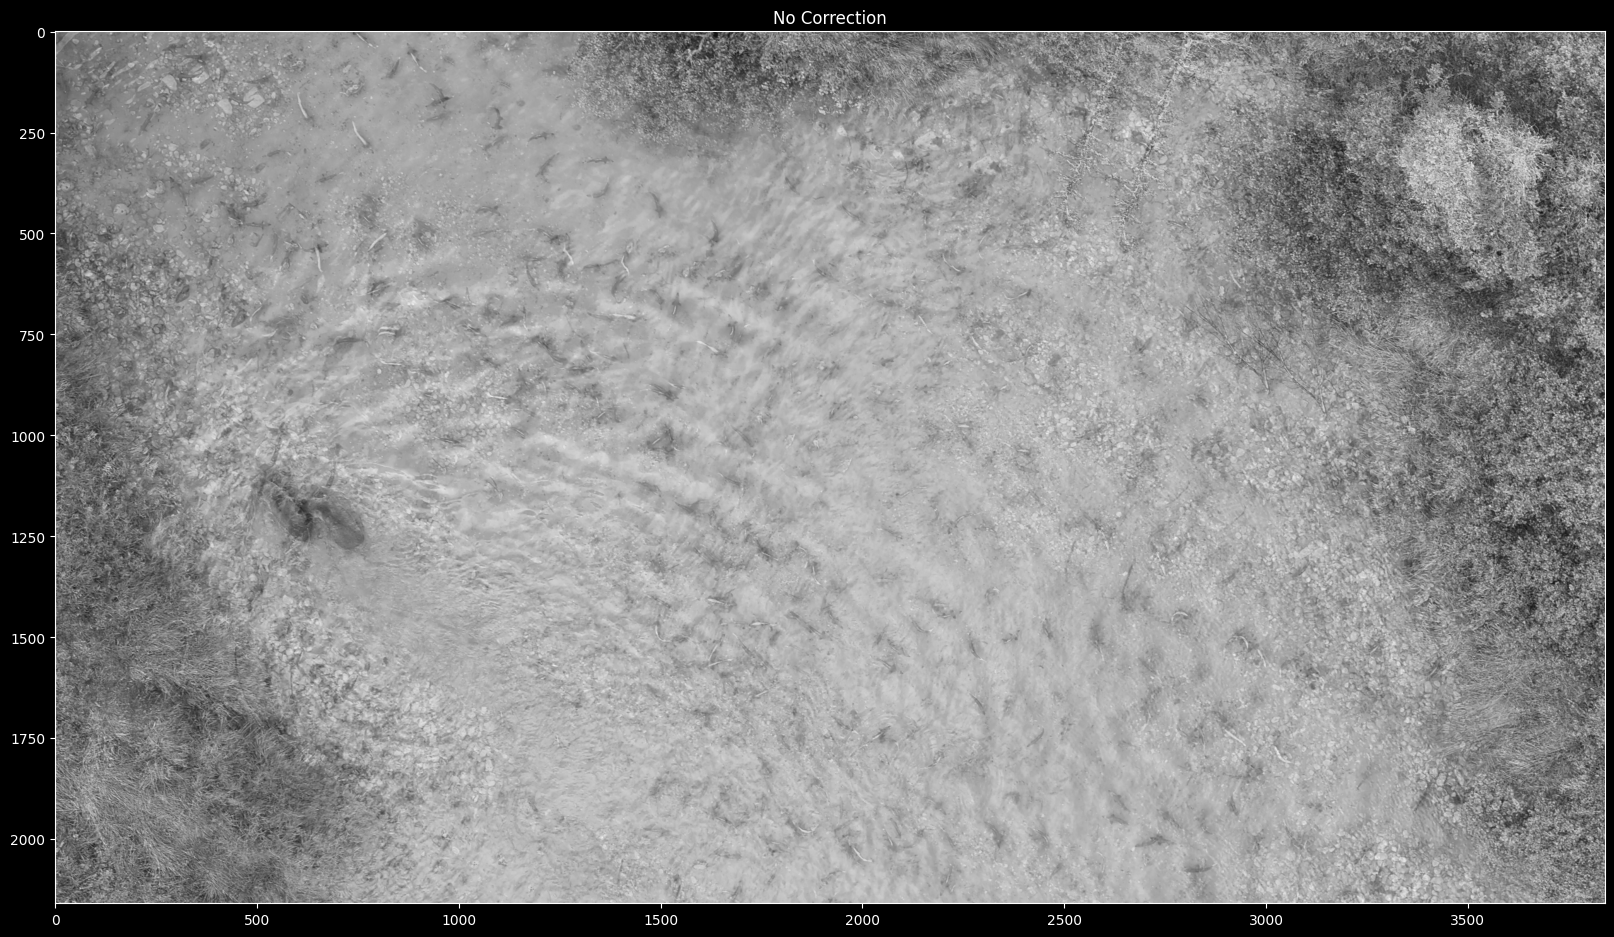

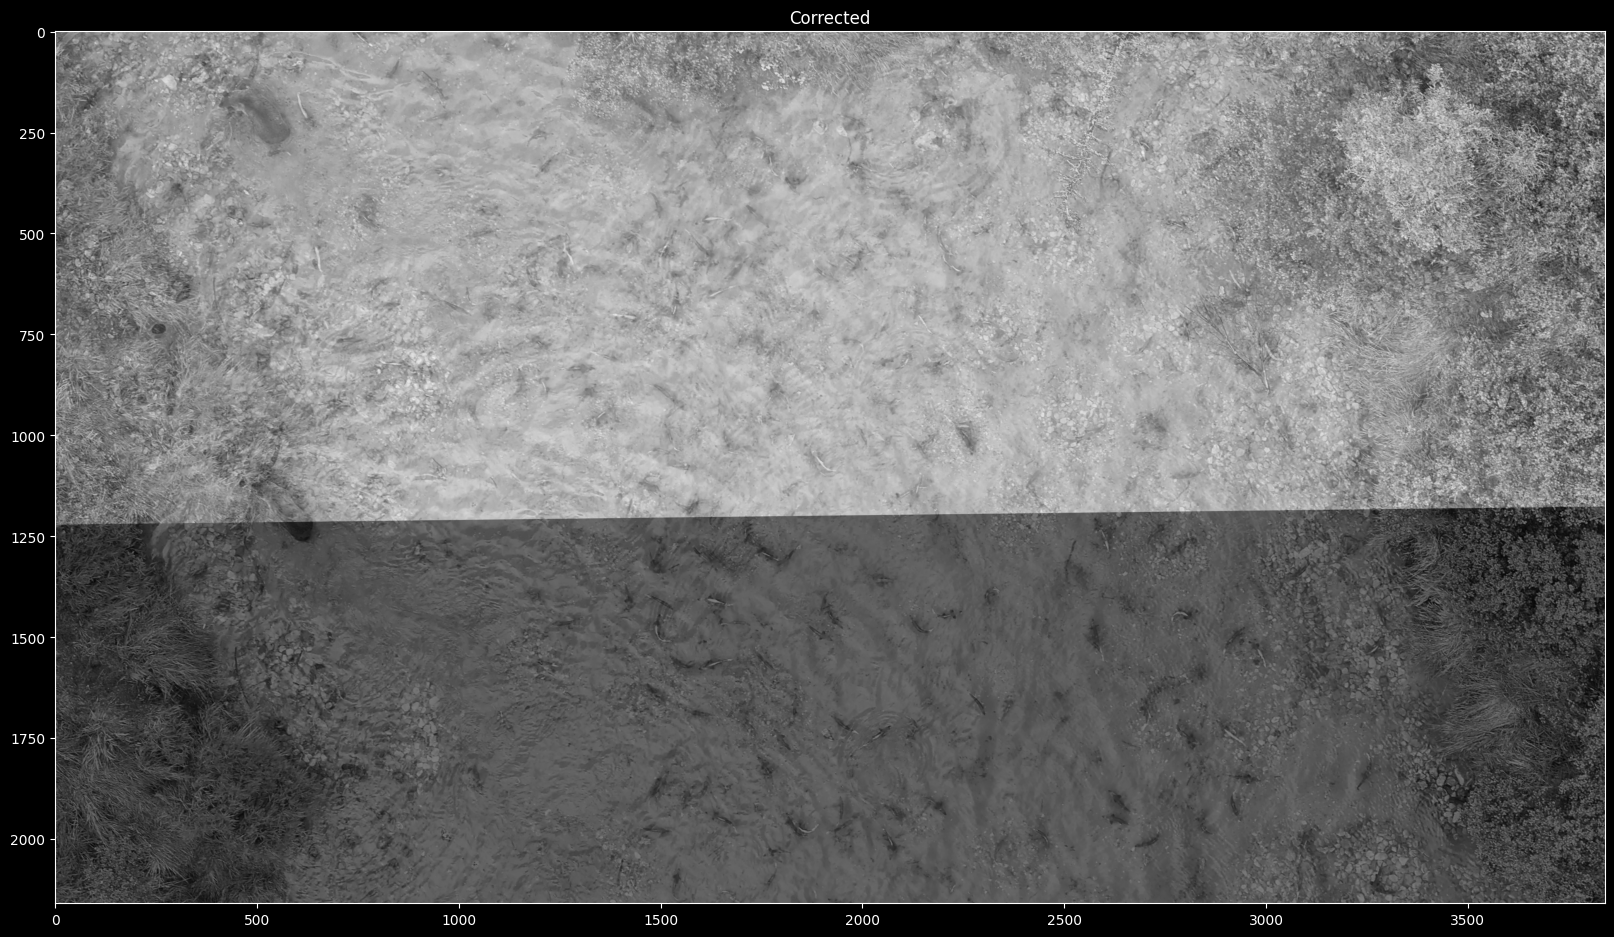

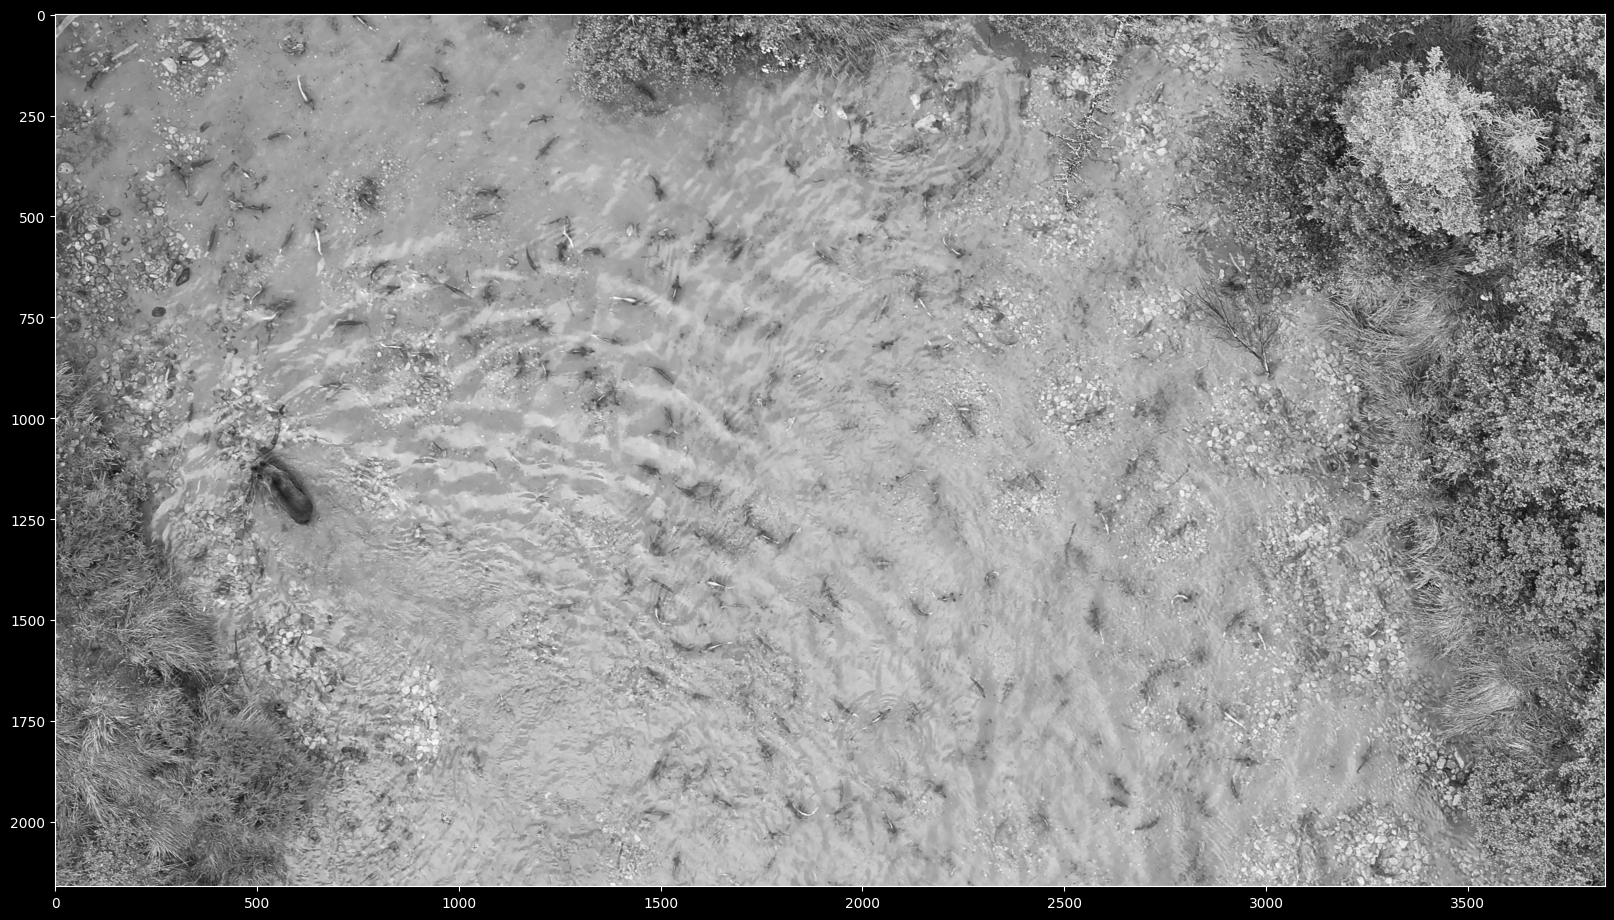

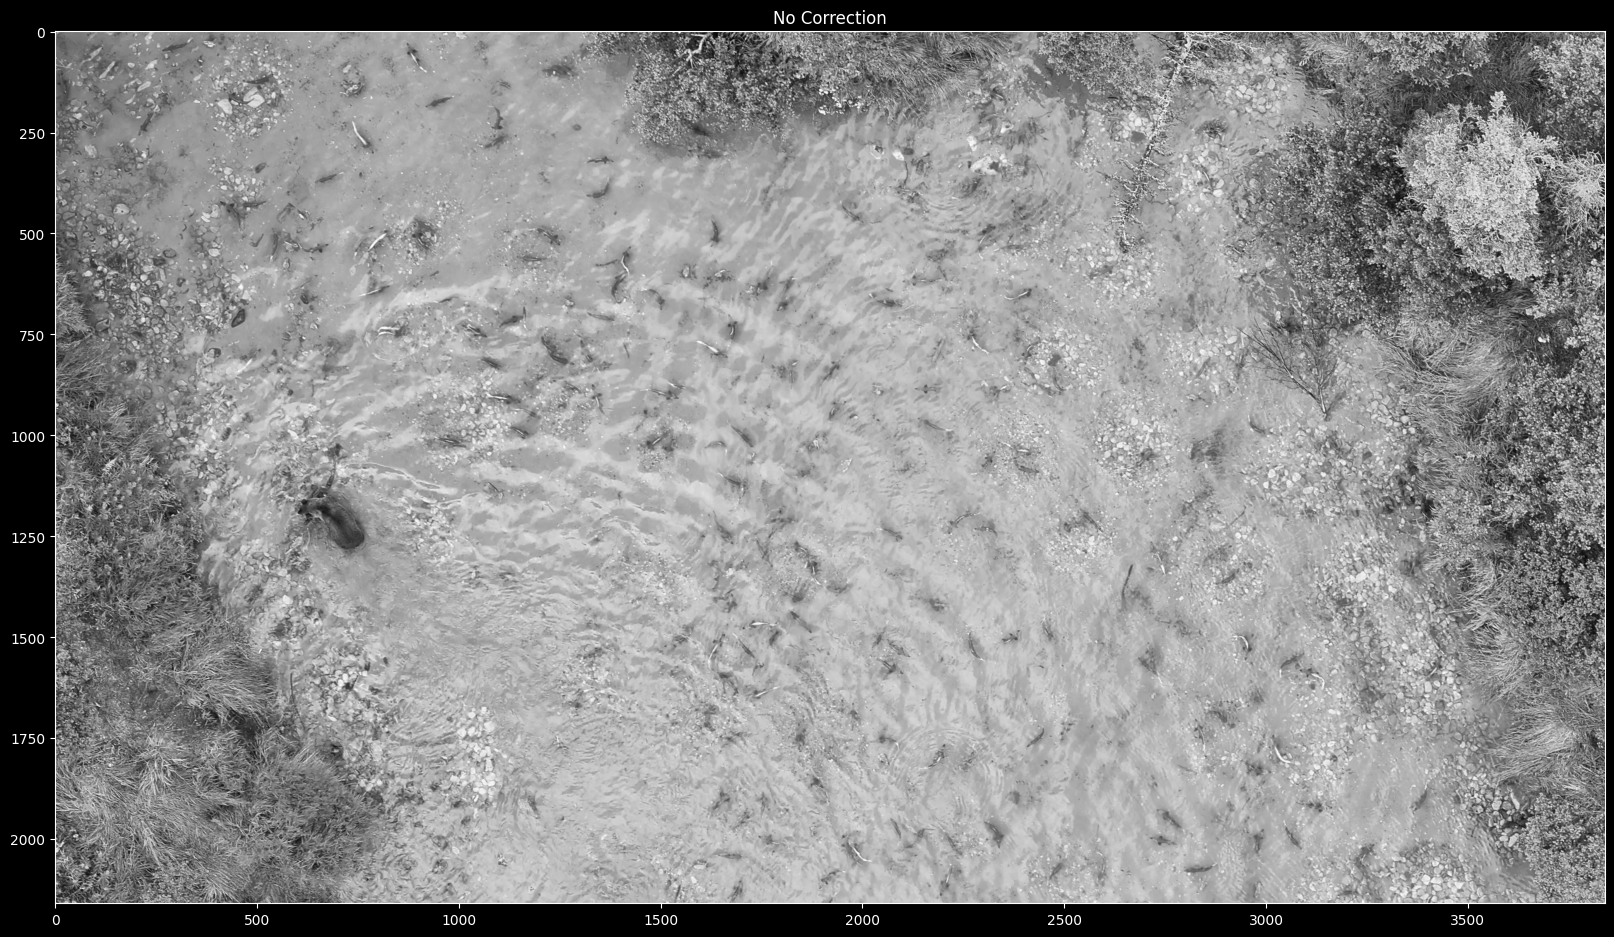

In [5]:
anchor_num = 20 # 10
last_warp = None
for frame_num, ex_warp in warps.items():
    if ex_warp['anchor_num'] == anchor_num:
        break
    last_warp = ex_warp

anchor_files = sorted(
        glob.glob(os.path.join(anchor_folder, "*.[jJ][pP][gG]"))
    )
import matplotlib.pyplot as plt
a_ind = anchor_num-1

frame0_raw = cv2.imread(anchor_files[a_ind])
frame0_gray = cv2.cvtColor(frame0_raw, cv2.COLOR_BGR2GRAY)

frame1_raw = cv2.imread(anchor_files[a_ind+1])
frame1_gray = cv2.cvtColor(frame1_raw, cv2.COLOR_BGR2GRAY)

warp = warps[frame_num-1]['warp']

warped_image = cv2.warpAffine(frame1_gray, M=warp[:2], 
                              dsize=(frame0_raw.shape[1], frame0_raw.shape[0]))

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.imshow(frame1_gray, alpha=.5, cmap='gray')
plt.title("No Correction")

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.imshow(warped_image, alpha=.5, cmap='gray')
plt.title("Corrected")

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.figure(figsize=(20,20))
plt.imshow(frame1_gray, alpha=1.0, cmap='gray')
plt.title("No Correction")

In [51]:
# Project name assosiated with the saved pix4d files

pix4d_project_name = f"bear-big-trail"

pix4d_folder = os.path.join("/Volumes/LaCie/salmon/pix4d/bears/", pix4d_project_name)
pix4d_info = mf.get_pix4d_info(pix4d_folder, pix4d_project_name, pmatrix_sort='simple',
                               load_ortho=True)
# These are the pmatrixes for all images across all days at that pond
pix4d_info['raw_pmatrices'] = copy.deepcopy(pix4d_info['pmatrices'])

/Users/benkoger/environments/general-coding/lib/python3.11/site-packages/osgeo/gdal.py:330: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [24]:
tracks_folder = "/Volumes/LaCie/salmon/bears/videos"
tracks = pickle.load(open(os.path.join(tracks_folder, f'{video_name}-tracks.pkl'), 'rb'))

/var/folders/5g/z2s6xjx97xd45k2zvtq5yrgc0000gn/T/ipykernel_83619/1871528104.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  tracks = pickle.load(open(os.path.join(tracks_folder, f'{video_name}-tracks.pkl'), 'rb'))


In [20]:
tracks[0]

NameError: name 'tracks' is not defined

In [46]:
# Parameters for projecting points from video into the 3D map
correct_threshold = 0.1 # Acceptable distance from target height above ground
max_guesses = 50 # Max tries to find a point along projection ray within correct_threshold  
initial_mu = 30 # Initial distance along projection ray to start searching
object_height = .25 # Target animal height above ground 

In [36]:
out_folder = "/Volumes/LaCie/salmon/bears/videos"

tracks = pickle.load(open(os.path.join(out_folder, f'{video_name}-tracks.pkl'), 'rb'))

/var/folders/5g/z2s6xjx97xd45k2zvtq5yrgc0000gn/T/ipykernel_83619/551512216.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  tracks = pickle.load(open(os.path.join(out_folder, f'{video_name}-tracks.pkl'), 'rb'))


In [47]:
import orthocount.mapping_functions as mf

In [67]:
demo_image = Image.open(anchor_files[0])
image_height = demo_image.height
image_width = demo_image.width

max_frames = max(warps.keys())

center_track = []

mu_est = 40
for frame_num in range(max_frames):
    

    anchor_index = warps[frame_num]['anchor_num']

    pmatrix_dict = mf.correct_pmatrix(pix4d_info['pmatrices'][anchor_index], 
                                    warps[frame_num]['warp'], mu_est)
    
    # pmatrix_dict = pix4d_info['pmatrices'][anchor_index]

    rotation_matrix = copy.copy(warps[frame_num]['warp'][:2, :2])

    # frame_pos = 

    # x = np.mean([box[0], box[2]])
    x = image_width / 2
    # y = np.mean([box[1], box[3]])
    y = image_height / 2
        
    track_uv_rot = np.matmul(rotation_matrix, np.array([x, y]))
    track_uv_rot = np.array([x, y])
    x_utm, y_utm, _, mu_est, _ = mf.from_image_to_map(track_uv_rot, mu_est, 
                                                pmatrix_dict, pix4d_info, 
                                                max_guesses, correct_threshold, 
                                                object_height)
    x_raster, y_raster = mf.utm_to_raster(x_utm, y_utm, pix4d_info, image_scale=1.0)
    center_track.append([x_raster, y_raster])
center_track = np.array(center_track)

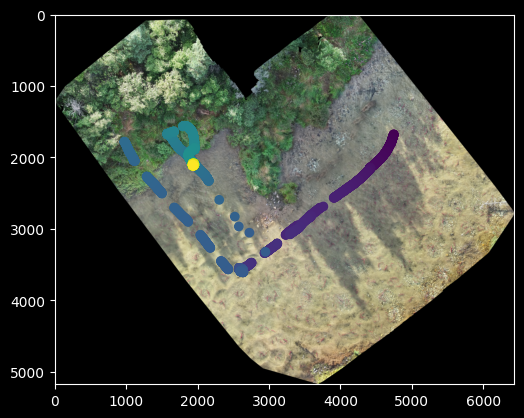

In [68]:
plt.imshow(pix4d_info['ortho'])
plt.scatter(center_track[:, 0], center_track[:, 1], c=range(len(center_track)))

In [50]:
pix4d_info.keys()

dict_keys(['pmatrices', 'offset', 'x_origin', 'y_origin', 'pixel_width', 'pixel_height', 'elevation_r', 'raw_pmatrices'])

In [49]:
x_raster, y_raster

(3466, 1513)

In [ ]:
def get_frame_pos_to_utm(frame_pos, anchor_index, segment_step, 
                         segment_movements_list, pmatrix_dict, pix4d, 
                         mu_est, max_guesses, correct_threshold, image_shape, 
                         bias=None, object_height=1):

    """ Calculate utm positions for every track at obs_ind.
    
    Return num tracks by two array. nan if track isn't present
    
    Args:
        frame_pos: frame coordinates (uv top left origin)
        anchor_index: groundtruth index
        segment_step: segment ind
        segment_movements_list: arrays relating frame to anchor
        pmatrix_dict: must contain inv_mmatrix (inverse of the first three columns of pmatrix)
            and p4 (fourth column of pmatrix). Corrected for this frame
            from the last anchor frame
        pix4d: dictionary of with keys:
            offset: camera coordinates offset
            elevation_r: elevation raster plot of map area
            pixel_width: pixel width of pixels in elevation raster in utm units
            pixel_height: like pixel width
            x_origin: origin of elevation raster in utm units
            y_origin: like x_origin
        mu_est: where to start looking for ground
        max_guesses: how many iterations to search along projection ray before returning estimate
        correct_threshold: if the distance between the point on the projection ray and the ground is 
                           within this threshold stop seraching and return point
        bias: how much to modify utm points (known error between segments for instance)
        object_height: expected height of object above ground
    """
    
    if anchor_index >= len(segment_movements_list):
        # Last frame
        if anchor_index < len(pix4d['pmatrices']):
            movement_matrix = np.eye(3)
        else:
            print("Error, gt_index too high, returning False, False")
            return False, False
    else:
        # Translation from last ground truth
        movement_matrix = segment_movements_list[anchor_index][segment_step]
    
    pmatrix_dict = correct_pmatrix(pix4d['pmatrices'][anchor_index], 
                                   movement_matrix, mu_est)

    rotation_matrix = copy.copy(movement_matrix[:2, :2])
    
    if bias is None:
        bias = np.zeros((len(tracks), 2), dtype=float)
    

    track_uv_rot = np.matmul(rotation_matrix, frame_pos)
    x_utm, y_utm, _, mu, _ = from_image_to_map(track_uv_rot, mu_est, 
                                               pmatrix_dict, pix4d, 
                                               max_guesses, correct_threshold, 
                                               object_height)

    utm = [x_utm, y_utm] + bias[track_ind]
    
    return utm, mu

In [42]:
anchor_num = warps[frame_num]['anchor_num']
pmatrix_info = pix4d_info['raw_pmatrices'][anchor_num]

In [ ]:
for track_id, track in tracks.items():
    if ind in track:
        box = track[ind]

In [ ]:
demo_image = Image.open(anchor_files[0])
image_height = demo_image.height
image_width = demo_image.width



fish_counts = []
dates = []
heat_maps = []
raw_fish_count = 0

for map_date in range(16, 17):
    print(f"date: {map_date}")
    counting.set_pmatricies_for_date(pix4d_info, map_date, frame_files)
    if len(pix4d_info['pmatrices']) == 0:
        print(f"No pmatricies for {map_date}")
        continue
    dates.append(map_date)
    # create_detection_normalization_layer()
    locs = counting.project_all_detections_to_map(
        pix4d_info, detection_folder, min_detection_confidence, initial_mu, 
        max_guesses, correct_threshold, object_height
    )
    
    # Size of one channel of ortho
    # uint8 to decrease memory (can't handle more than 255 cameras recording pixel!)
    camera_count_map = np.zeros_like(orthomap[..., 0], dtype=np.uint8)
    # For each camera, we are going to estimate what the camera sees in the landscape 
    # with the polygon defined by a number of points along the edge of the camera image
    # projected into the scene. If flat earth, only need the corners. On 3d earth this
    # is an aproximation that is better or worse depending on the ground structure. 
    # Can add more points along edge to get a better aproximation.
    edge_coords = counting.get_image_edge_coordinates(image_width, image_height, points_per_edge=50)
    
    for pmatrix_dict in pix4d_info['pmatrices'][:]:
        view_mask = counting.get_camera_view_mask(pmatrix_dict, edge_coords, camera_count_map*0, 
                                         pix4d_info, ortho_info, z_guess=initial_mu, max_guesses=max_guesses, 
                                         correct_threshold=correct_threshold, 
                                         object_height=object_height)
        camera_count_map += view_mask
    
    fish_heatmap = np.zeros_like(orthomap[..., 0], dtype=float)
    
    for im_locs in locs:
        for loc in im_locs:
            raster_loc = mf.utm_to_raster(*loc[:2], ortho_info)
            raster_loc = counting.constrain_point_to_ortho(raster_loc, orthomap)
            normalization = camera_count_map[raster_loc[1], raster_loc[0]]
            if normalization == 0:
                print(raster_loc)
            fish_heatmap[raster_loc[1], raster_loc[0]] = 1 / normalization
            raw_fish_count += 1
    
    fish_heatmap = cv2.GaussianBlur(fish_heatmap, (201, 201), 30)
    heat_maps.append(fish_heatmap)
    
    fish_counts.append(np.sum(fish_heatmap))
print(raw_fish_count)
print(fish_counts[0])